In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_file_path = r"E:\Machine Learning\machine learning pipeline\Machine_learning_project\housing\artifact\data_ingestion\2022-06-27-11-16-31\raw_data\housing.csv"

In [3]:
housing_data_frame = pd.read_csv(csv_file_path)

In [4]:
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:ylabel='Frequency'>

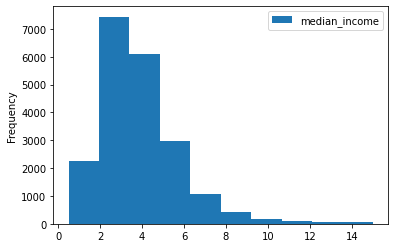

In [5]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [6]:
 housing_data_frame["income_cat"] = pd.cut(housing_data_frame["median_income"],
                                                      bins=[0,1.5,3.0,4.5,6.0,np.inf],
                                                      labels=["1","2","3","4","5"])

In [7]:
housing_data_frame["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']

In [10]:
housing_data_frame.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

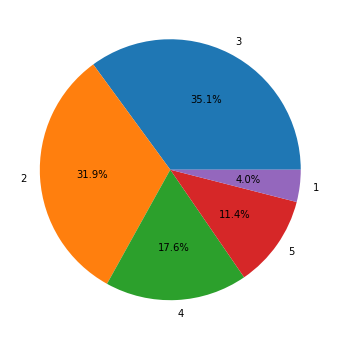

In [12]:
plt.figure(figsize=(12,6))
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index,autopct="%1.1f%%")
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [17]:
for train_index,test_index in split.split(housing_data_frame,housing_data_frame["income_cat"]):
    print(train_index,test_index)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [18]:
train_df = housing_data_frame.loc[train_index]

In [19]:
housing_data_frame.shape

(20640, 11)

In [20]:
train_df.shape

(16512, 11)

In [22]:
test_df = housing_data_frame.loc[test_index]

In [23]:
test_df.shape

(4128, 11)

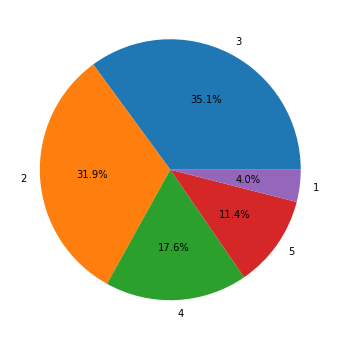

In [24]:
plt.figure(figsize=(12,6))
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index,autopct="%1.1f%%")
plt.show()

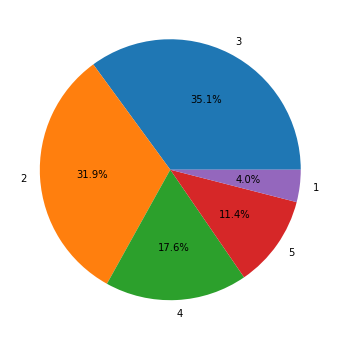

In [25]:
plt.figure(figsize=(12,6))
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index,autopct="%1.1f%%")
plt.show()

In [26]:
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [27]:
housing_data_frame.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [28]:
housing_data_frame.dtypes.index

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [29]:
data_type = list(map(lambda x: x.name,housing_data_frame.dtypes))

In [31]:
column= housing_data_frame.columns

In [32]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}